In [165]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


combined_wine = pd.read_csv('combined_wine.csv')
combined_wine.head()
combined_wine.shape

(6497, 13)

In [166]:
# make a copy of the data

combined_wine_copy = combined_wine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
combined_wine_copy['quality_label'] = combined_wine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

combined_wine_copy.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


In [167]:
#coun the number of each quality label
combined_wine_copy['quality_label'].value_counts()

quality_label
medium    4974
high      1277
low        246
Name: count, dtype: int64

Droping the columns

In [168]:
# drop the 'quality' column
combined_wine_copy = combined_wine_copy.drop(columns = 'quality')

Encoding

In [169]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Create encoders
le = LabelEncoder()  # for wine type
ord_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])  # for quality

# Encode wine type using LabelEncoder (no inherent order)
combined_wine_copy['type'] = le.fit_transform(combined_wine_copy['type'])

# Encode quality_label using OrdinalEncoder (with ordered categories)
combined_wine_copy['quality_label'] = ord_encoder.fit_transform(
    combined_wine_copy[['quality_label']]
)

# Display the result
print(combined_wine_copy.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  type  quality_label  
0      9.4     0            1.0  
1      9.8     0  

Split the Data

In [170]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

X = combined_wine_copy.drop('quality_label', axis=1) #features
y = combined_wine_copy['quality_label'] #target

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("original:",combined_wine_copy.shape, "\nX:", X.shape, "\ny:", y.shape)

original: (6497, 13) 
X: (6497, 12) 
y: (6497,)


In [171]:
y_test.value_counts()
y_test.shape
y_train.value_counts()
y_train.shape


(5197,)

In [172]:
# # normalize data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Building model - RandomForestClassifier

0.8584615384615385


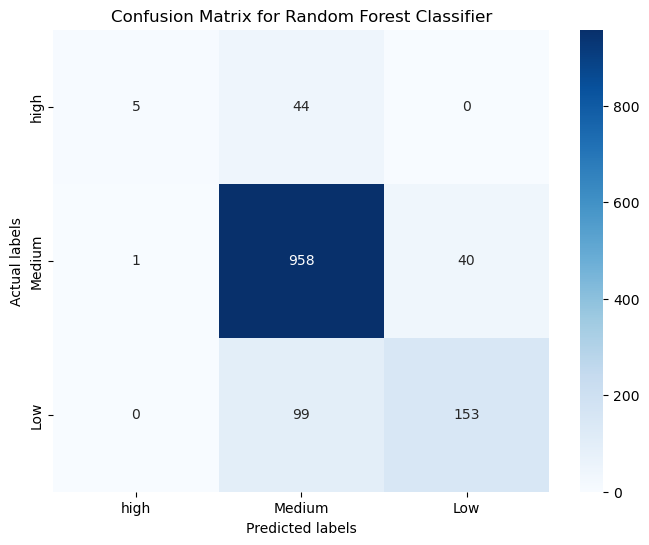

In [179]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier


#initializing the model
RF_model = randomforestclassifier(random_state=42)

#fitting the model
RF_model.fit(X_train, y_train)

# Prediction
preds = RF_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

classification_report(y_test, preds) #classification report
#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])  
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Building model - RandomForestClassifier - Model Improvement - RandomizedSearchCV

In [174]:
import numpy as np

param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

In [175]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier
from sklearn.model_selection import RandomizedSearchCV

#initializing the model
RF_model = randomforestclassifier(random_state=42)

#initializing the RandomizedSearchCV
RS_grid = RandomizedSearchCV(
    estimator=RF_model,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    return_train_score=True
)

#fitting the model
RS_grid.fit(X_train, y_train)

preds = RS_grid.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

0.8207692307692308


In [176]:
grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_score"], columns=["Accuracy"])
], axis=1)

grid_results

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,class_weight,bootstrap,Accuracy
0,300,5,4,sqrt,20.0,balanced,True,0.588850
1,250,5,2,log2,20.0,balanced,True,0.554247
2,350,10,2,sqrt,20.0,balanced,True,0.573914
3,300,5,2,log2,15.0,balanced,True,0.558207
4,350,5,4,log2,NaN,balanced,True,0.586993
5,250,10,2,log2,20.0,balanced,True,0.577532
6,350,10,4,sqrt,20.0,balanced,True,0.591976
7,300,5,2,sqrt,20.0,balanced,True,0.551804
8,350,5,2,sqrt,15.0,balanced,True,0.559424
9,300,5,4,sqrt,NaN,balanced,True,0.586899


In [177]:
print(RS_grid.best_params_)

{'n_estimators': 350, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced', 'bootstrap': True}


In [181]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

# Split your data into training and testing sets (replace X, y with your dataset)
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42, sampling_strategy={0: 4974, 1: 4974, 2: 4974})
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
RF_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
RS_grid = RandomizedSearchCV(
    estimator=RF_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    return_train_score=True
)

# Fit the model with the balanced data
RS_grid.fit(X_train_balanced, y_train_balanced)

# Print the best hyperparameters
print("Best Hyperparameters:", RS_grid.best_params_)

# Predict on the test set
preds = RS_grid.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)

# Generate and print confusion matrix and classification report
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, preds))

Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}
Accuracy: 0.8092307692307692
Confusion Matrix:
[[ 18  31   0]
 [ 35 841 123]
 [  1  58 193]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.37      0.35        49
         1.0       0.90      0.84      0.87       999
         2.0       0.61      0.77      0.68       252

    accuracy                           0.81      1300
   macro avg       0.62      0.66      0.63      1300
weighted avg       0.83      0.81      0.81      1300



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Gradient Boosting Classifier with default parameters
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8061538461538461
Confusion Matrix:
[[ 159    0  224]
 [   0    5   69]
 [  78    7 1408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.42      0.51       383
           1       0.42      0.07      0.12        74
           2       0.83      0.94      0.88      1493

    accuracy                           0.81      1950
   macro avg       0.64      0.48      0.50      1950
weighted avg       0.78      0.81      0.78      1950

